In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.2, random_state=42)
# train_test_split : default => 데이터를 75% 훈련 세트와 25% 테스트 세트로 분할. test_size를 사용하여 비율 조정 가능
# random_state : 무작위성을 제어하는 데 사용되는 시드값, random_state를 설정하면 데이터 분할이 일관되게 유지됨

In [4]:
# 2차원 배열로 만들기
train_input = train_input.reshape(-1, 1)
test_iput = test_input.reshape(-1, 1)

In [9]:
# k-최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target) # 훈련

KNeighborsRegressor(n_neighbors=3)

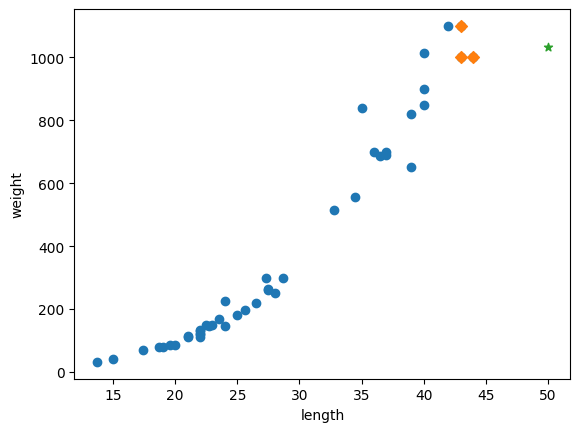

In [14]:
distances, indexes = knr.kneighbors([[50]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

# 예측에 사용된 이웃 & 예측된 값
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033.33333333, marker='*')
plt.show()

In [19]:
#선형회귀

In [17]:
# 대안 - 위 문제를 해결 하기 위한 선형회귀 모듈 사용
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target) # 훈련

LinearRegression()